# <center> <h1>Data description - exercices </h1> </center>

<img src="./images/description.png" width="200">

Source de données : https://www.kaggle.com/c/pubg-finish-placement-prediction/data

In [24]:
get_ipython().magic(u'matplotlib inline')
%run -i ./utils/credentials.py
%run -i ./utils/imports.py

In [25]:
data_path = "./data/PUBG_train_sample.csv"

In [26]:
data_PUBG = pd.read_csv(data_path)

Dans une partie PUBG (PlayerUnknown's Battlegrounds), jusqu'à 100 joueurs commencent à chaque match (matchId). Les joueurs peuvent faire partie d'équipes (groupId) classées à la fin du jeu (winPlacePerc) en fonction du nombre d'équipes encore en vie au moment de leur élimination. Dans le jeu, les joueurs peuvent choisir différentes munitions, raviver leurs coéquipiers morts au combat, conduire des véhicules, nager, courir, tirer et en subir toutes les conséquences, telles que tomber trop loin ou se renverser se débarrasser d'eux-mêmes.

La table de données regroupe des informations relatives à des parties de jeux PUBG anonymisées. Chaque ligne contient les résultats d'un joueur après la partie. Les données proviennent de tous types de partie : solos, duos, squads et custom.

In [27]:
data_PUBG.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# Description des variables 'teamKills' et 'vehicleDestroys'

###### Quelle est la moyenne des 'teamKills' et 'vehicleDestroys' ?

In [28]:
cols = ['teamKills', 'vehicleDestroys']

In [29]:
data_PUBG[cols].mean()

teamKills          0.02370
vehicleDestroys    0.00785
dtype: float64

###### Comment interpréter ces moyennes ?

Il semble qu'en général les joueurs ne détruisent pas de véhicule et ne tuent pas de membres de leur équipe.

###### Connaissez_vous un autre indicateur de tendance centrale qui pourrait confirmer cela ? Quel est sa définition ?

La médiane est un indicateur de tendance centrale qui n'est pas sensible aux valeurs extrêmes. C'est la valeur telle que la moitié des  (𝑥1,...,𝑥𝑛) sont supérieurs à la médiane et l'autre moitié ont une valeur inférieure.

In [30]:
data_PUBG[cols].median()

teamKills          0.0
vehicleDestroys    0.0
dtype: float64

La médiane confirme qu'au moins la moitier des joueurs n'ont tué aucun de leurs coéquipier au cours de la partie.

###### Quels indicateurs nous permettrait d'affiner notre compréhension de ces variables ? Que nous disent-ils ?

Ici on peut utiliser les quantiles (comme les quartiles sauf que l'on découpe les données en n classes).

In [31]:
var = 'teamKills'
n = 100 # nombre de classe
q = [ii/(n) for ii in range(n+1)] # découpage de l'intervalle [0,1] en n classes

q_values = np.quantile(data_PUBG[var],q=q)
Quantiles = pd.DataFrame({"quantiles":q, "valeurs":q_values})

Quantiles[Quantiles["valeurs"]>0] # on ne retourne que les valeurs positives

,quantiles,valeurs
98,0.98,1.0
99,0.99,1.0
100,1.00,5.0


Environ 2% des joueurs ont tué un membre de leur équipe pendant la partie. Et si certains ont tué plus d'1 membre de leur équipe, ils sont moins de 1% dans ce cas. Au moins 1 joueur a tué 9 membres de son équipe.

# Description de la variable 'walkDistance'

###### Quelles est l'ordre de grandeur de la distance parcourue à pieds par un joueur lors d'une partie ? Comment estimer si les joueurs ont des stratégies de déplacement à pied très différentes ?

Pour la distance parcourue à pied il est pertinent d'utiliser la moyenne et l'écart-type. On peut également contrôler avec la médiane si la moyenne n'est pas "perturbée" par quelques valeurs extrêmes.

In [32]:
col = 'walkDistance'
data_PUBG[col].mean(), data_PUBG[col].median(), data_PUBG[col].std()

(1152.4796119880004, 682.3499999999999, 1183.0346755899054)

Les joueurs marchent aux alentours de 1,1km par partie. Mais la motier d'entre eux ne se déplace de pas plus que 680m. De plus, cette variable présente un écart-type très élevé (ordre de grandeur de la moyenne). Il y a donc des comportement très variés. On peut par exemple se dire que certains sont très mobiles, alors que d'autres restent "en blanque" ou ont choisi d'utiliser un véhicule ou de nager (!!).

## Description assist

###### Certaines variables quantitatives peuvent être vue comme des variables qualitatives en raison du nombre réduit de valeurs qu'elles prennent. Décrivez la variable 'assist' comme une variable qualitative.

In [33]:
var = "assists"

In [34]:
x = data_PUBG.groupby(var).Id.count().index
y = data_PUBG.groupby(var).Id.count()/len(data_PUBG)

<BarContainer object of 13 artists>

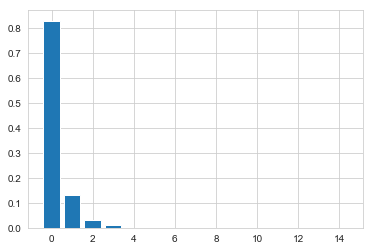

In [35]:
import matplotlib.pyplot as plt
plt.bar(x, round(y,2))

###### Que peut-on en conclure ?

Plus de 80% des joueurs ne portent pas assistance à un coéquipier lors d'une partie. Ce qui le font trois fois ou plus sont raricimes.

# Corrélation entre les distances parcourues

###### Existe-il un lien entre la distance parcourue à pied et celle parcourue en véhicule ?

In [36]:
data_PUBG.columns
x = data_PUBG["walkDistance"]
y = data_PUBG["rideDistance"]

In [37]:
np.corrcoef(x,y)

array([[1.        , 0.31027131],
       [0.31027131, 1.        ]])

Il existe un lien linéaire positif modéré entre les variables. Les joueurs mobiles avec un véhicule aurait une propention à marcher un peu plus que la moyenne, sans que ce constat soit vraiment très marqué.
Cela ne veut pas dire qu'il n'y a pas une relation non-linéaire plus forte entre ces variables qui ne serait pas captée par les coefficients de corrélation.

# Get more on my github <img src="./images/github.png" width="100">
https://github.com/JJublanc/statistics_tools

In [ ]:
# jupyter nbconvert --to data_description_exercices.ipynb --post serve 